# Project: Random Acts of Pizza - Baseline
## Team: Arriaga, Carolina and Mahajan, Kanika

## Objective
Create a baseline model to classify if a user request in the subreddit Random Acts of Pizza will get a positive/negative fulfillment.

Positive: User gets a pizza.

Negative: User doesn't get a pizza.

## Data Transformation

Let's review the approapiate transformation for the variables of internest (data obtained from data process notebook).

### Outcome variable - True False
**y** = requester_received_pizza


### Independent variables
**Post upvotes** = number_of_upvotes_of_request_at_retrieval - number_of_downvotes_of_request_at_retrieval

**Text length (word count)** = count(request_text)

**Text compound sentiment** = sentiment function (request_text)

**Title length (word count)** = count (request_title)

**Title sentiment** = sentiment function (request_title)

**Days since request** = requester_days_since_first_post_on_raop_at_retrieval - requester_days_since_first_post_on_raop_at_request

**User subs on (count of subreddits)** = requester_number_of_subreddits_at_request

**User activity comments** = requester_number_of_comments_at_retrieval - requester_number_of_comments_at_request

**User activity comments raop** = requester_number_of_comments_in_raop_at_retrieval - requester_number_of_comments_in_raop_at_request

**User posts reddit** = requester_number_of_posts_at_retrieval - requester_number_of_posts_at_request

**User posts raop** = requester_number_of_posts_on_raop_at_retrieval - requester_number_of_posts_on_raop_at_request

**Comment count** = request_number_of_comments_at_retrieval 

**User rate start** = requester_upvotes_plus_downvotes_at_request / requester_upvotes_plus_downvotes_at_request

**User rate end** = requester_upvotes_minus_downvotes_at_retrieval / requester_upvotes_plus_downvotes_at_retrieval

**Account age (days)** = requester_account_age_in_days_at_retrieval

Unused variables:
- post_was_edited
- request_id
- request_text_edit_aware
- unix_timestamp_of_request
- unix_timestamp_of_request_utc

Requester info unused vairables:
- requester_account_age_in_days_at_request
- requester_subreddits_at_request
- requester_upvotes_minus_downvotes_at_request
- requester_user_flair
- requester_username


# Model Preparation

Now that we have the data pipeline ready, we can create our logistic regression model.

In [5]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Data manipulation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ML Scikit
## Decision Trees
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 

# Regression model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# Feature handling
from sklearn.model_selection import train_test_split

# Reports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

# For producing decision tree diagrams.
from IPython.core.display import Image, display
from six import StringIO

#Visualizing Confusion Matrix using Heatmap
import seaborn as sns

In [6]:
# ?LogisticRegression

## Quick EDA

We ran a quick scatterplot to see relationships between variables. We believe the relationship is linear and that's a reason why we think a Logistic Regression might be a good model. Let's run a check.

In [7]:
# load the data
df = pd.read_csv('../data/interim/logit_sentiments.csv')
# scatter_matrix(raop, alpha=0.2, figsize=(20, 20), diagonal='hist')

#Missing data (looks good)
df.isnull().sum()

post_was_edited                0
post_upvotes                   0
text_word_count                0
text_sentiment                 0
title_word_count               0
title_sentiment                0
days_since_request             0
user_activity_comments         0
user_activity_comments_raop    0
user_posts_reddit              0
user_posts_raop                0
user_rate_start                0
user_rate_end                  0
requester_received_pizza       0
dtype: int64

## Data Handling

Now will separate variables, randomize and split our test sets to fit our model.

In [8]:
# Data Handling for Model

X, Y = df.iloc[:,:-1], df.iloc[:,-1]

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X.iloc[shuffle], Y.iloc[shuffle]

# Split into train and test.
# train_data, train_labels = X[:350], Y[:350]
# test_data, test_labels = X[350:], Y[350:]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.4, random_state=1)


In [9]:
# Let's see the different tests

print("Train X,y - ", X_train.shape, " ", y_train.shape)
print("Dev X,y   -  ", X_dev.shape, "  ", y_dev.shape)
print("Test X,y  -  ", X_test.shape, "  ", y_test.shape)
print("Total: ", X_train.shape[0] + X_dev.shape[0] +  X_test.shape[0])

Train X,y -  (3030, 13)   (3030,)
Dev X,y   -   (606, 13)    (606,)
Test X,y  -   (404, 13)    (404,)
Total:  4040


## Model 1: Logistic Regression

In [10]:
# fit model
lr_model = LogisticRegression(max_iter= 1000, solver='liblinear')
lr_model.fit(X_train, y_train)

# predictions
y_pred = lr_model.predict(X_dev)

# results
cnf_matrix = metrics.confusion_matrix(y_dev, y_pred)
# print(cnf_matrix)
print(classification_report(y_dev, y_pred))
report_log = classification_report(y_dev, y_pred, output_dict=True)
print("Accuracy for Logistic regression model is", round(report_log['accuracy'],2))

# Weights to discuss feature selection
# coef = lr_model.coef_[0]
# print(coef, X_train.columns)

              precision    recall  f1-score   support

       False       0.86      0.94      0.90       455
        True       0.75      0.52      0.62       151

    accuracy                           0.84       606
   macro avg       0.80      0.73      0.76       606
weighted avg       0.83      0.84      0.83       606

Accuracy for Logistic regression model is 0.84


Text(0.5, 257.44, 'Predicted label')

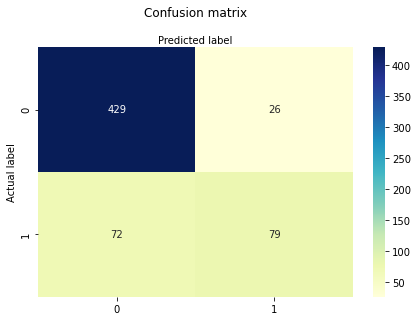

In [11]:
#Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Model 2: KNN 

In [12]:
# Fit K-NN classifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_dev)

# Results
# results
cnf_matrix = metrics.confusion_matrix(y_dev, y_pred)
# print(cnf_matrix)
print(classification_report(y_dev, y_pred))
report_log = classification_report(y_dev, y_pred, output_dict=True)
print("Accuracy for Logistic regression model is", round(report_log['accuracy'],2))


              precision    recall  f1-score   support

       False       0.75      0.93      0.83       455
        True       0.29      0.09      0.13       151

    accuracy                           0.72       606
   macro avg       0.52      0.51      0.48       606
weighted avg       0.64      0.72      0.66       606

Accuracy for Logistic regression model is 0.72


Text(0.5, 257.44, 'Predicted label')

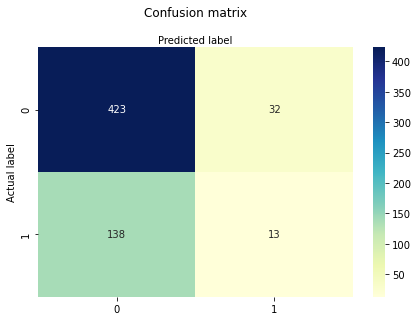

In [13]:
#Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Model 3: Random Forest

In [14]:
dt = DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=0)
dt.fit(X_train, y_train)

print ('Accuracy (a decision tree):', dt.score(X_dev, y_dev))

rfc = RandomForestClassifier(n_estimators=20, max_depth=4)
rfc.fit(X_train, y_train)

print ('Accuracy (a random forest):', rfc.score(X_dev, y_dev))

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=0.1)

abc.fit(X_train, y_train)
print ('Accuracy (adaboost with decision trees):', abc.score(X_dev, y_dev))



Accuracy (a decision tree): 0.7557755775577558
Accuracy (a random forest): 0.8217821782178217
Accuracy (adaboost with decision trees): 0.83003300330033


# Baseline model Selection

We chose as a baseline model the Model 1: Logistic Regression because it has the highest accuracy compared to Model 2 and Model 3. We will focus on optimization of Model 1 in the future.

# Next steps

- Merge data setps: Kanika will provide the word frequencies for the most frequent words (goal: reduce amount of features), include "context" in the word frequency, timestamp analysis, username analysis.
- Add reference articles to the Reference section md: Caro and Kanika
- Explore Binarization and unused variables to see impact in accuracy, remove and record variables with low weight from the analysis: Carolina
- Merge csv from Kanika with Caro and run regression again, ping Kanika and resync: Caro
